<h1>Trabajo practico: Machine Learning</h1>
Alumnos: Ferrari, Franco Matias.
         Michel Torino, Tomás.
         Umaña, Gabriela.

<h3>Importando herramientas y cargando datos</h3>

In [44]:
# Set path 
import os
import sys
module_path = os.path.abspath(os.path.join('../util'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Scripts propios
import modeler_FF as md

# Librerias basicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Librerias de balanceo 
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Librerias de modelado
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics

# Modelos
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
# Cargo los datos
data = pd.read_csv("train.csv") # the train dataset is now a Pandas DataFrame

In [43]:
data.head(5)

,ID,nac,age,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,75466,2.0,23,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71399.61,0
1,62050,2.0,32,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90216.24,0
2,59104,2.0,27,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42225.96,0
3,15337,2.0,43,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112036.86,0
4,13008,2.0,23,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72349.32,0


<h3>Exploration Data Analysis (EDA)</h3>

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33008 entries, 0 to 33007
Columns: 312 entries, ID to TARGET
dtypes: float64(97), int64(215)
memory usage: 78.6 MB


In [5]:
data.info(verbose = True, null_counts = True)

# Los datos son todos de tipo numerico (int y float)
# el prefijo 'imp' y 'saldo'  indican importes y saldos (var continuas).
# el prefijo 'num' indica número de cosas (contactos a call center, cantidad de productos contratados, etc.)
# el prefijo 'ind'  indican parecería ser un flag (variable categórica).
# el prefijo 'delta' indica cambios en el tiempo de alguna de las variables.
# Aparecen algunas variables misteriosas como var 36, 21 y 38.
# Valores Nulls en: nac

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33008 entries, 0 to 33007
Data columns (total 312 columns):
ID                               33008 non-null int64
nac                              32952 non-null float64
age                              33008 non-null int64
imp_ent_var16_ult1               33008 non-null float64
imp_op_var39_comer_ult1          33008 non-null float64
imp_op_var39_comer_ult3          33008 non-null float64
imp_op_var40_comer_ult1          33008 non-null float64
imp_op_var40_comer_ult3          33008 non-null float64
imp_op_var40_efect_ult1          33008 non-null int64
imp_op_var40_efect_ult3          33008 non-null float64
imp_op_var40_ult1                33008 non-null float64
imp_op_var41_comer_ult1          33008 non-null float64
imp_op_var41_comer_ult3          33008 non-null float64
imp_op_var41_efect_ult1          33008 non-null float64
imp_op_var41_efect_ult3          33008 non-null float64
imp_op_var41_ult1                33008 non-null float64


In [4]:
df_aux = pd.DataFrame(data.TARGET.value_counts())
df_aux['Porcentaje'] = 100*df_aux['TARGET']/data.shape[0]
df_aux

# Datos desbalanceados
# Se utilizará SMOTE y Undersampling para balancear mas adelante

,TARGET,Porcentaje
0,30000,90.887058
1,3008,9.112942


In [52]:
# La variable nac pareciera tener casi todos sus valores concentrados en "2"


0.0    40
Name: nac, dtype: int64

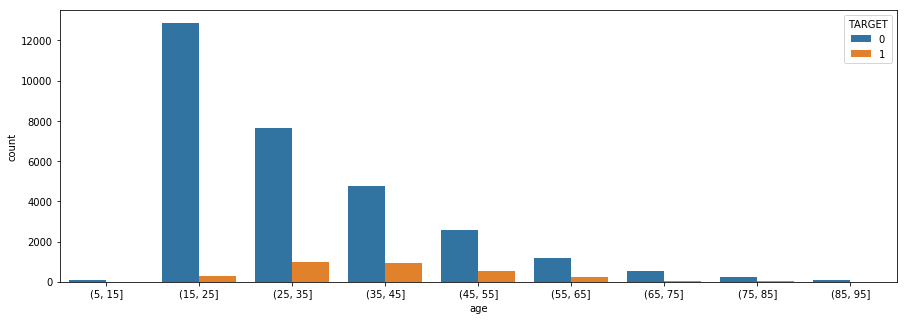

In [86]:
# Analizamos la variable age
mybins = range(int(df[df.age.notnull()].age.min()), int(df[df.age.notnull()].age.max()), 10)
s = pd.cut(df[df.age.notnull()].age, bins=mybins).dropna()
s = pd.merge(s, df.TARGET, left_index=True, right_index=True, how='left')

plt.subplots(figsize=(15,5))
sns.countplot(x="age", hue="TARGET", data=s)

<h6>Primer limpieza de datos (solo nulos)</h6>

In [4]:
df = data.fillna(2)
df.drop(columns=['ID'], inplace = True)

<h6>Primeras observaciones y definición de la estrategia a seguir</h6>

A primera vista el dataset se encuentra muy desbalanceado, es de una dimensión considerable (312 columnas), contiene valores nulos unicamente en la columna "nac". 

Con este primer relevamiento se define la estrategia siguiente: 

    -1. Se hará un primer feature selections para descartar variables innecesarias y entender cuales son las variables importantes. 
    
    -2. Luego se realizará un analisis en detalle de las variables mas importantes, y se determinará si es necesario realizar algun tratamiento de outliers. En base a dicho analisis se espera realizar ingenieria de atributos. 
    
    -3. Por ultimo, se aplicarán tecnicas para balancear el dataset y seleccionar que tipos de algoritmos de modelado es mas conveniente trabajar.
    
    -4. El proyecto se cierra comparando las metricas de los mejores modelos entreneados y seleccionando el mejor de ellos.

<h4>Primera seleccion de atributos</h4>

In [5]:
# Separamos la variable target del resto de las features
features = df.loc[:, df.columns != 'TARGET']
labels = df.loc[:, df.columns == 'TARGET']

# Dividimos el dataset en test y train en un 30%. IMPORTANTE: siempre fijamos la semilla en 42 para poder replicar experimentos
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

<h5>Removemos features constantes</h5>

In [6]:
sel = VarianceThreshold(threshold=0) 
sel.fit(X_train)  # Encuentra las variables constantes

VarianceThreshold(threshold=0)

In [7]:
sum(sel.get_support())

295

In [8]:
# we can then drop these columns from the train and test sets
X_train = X_train[X_train.columns[sel.get_support(indices=True)]]
X_test = X_test[X_test.columns[sel.get_support(indices=True)]]

<h5>Random forest para feature selection</h5>

In [10]:
# Definimos un Random Forest con algunas restricciones en los hyperparametros 
# solo con la idea de entender las variables mas importantes. 
# Para esto, necesitamos que las metricas de performance entre test y train sean similares.

rf = RandomForestClassifier(n_estimators=500,
                            max_features= 'auto',
                            max_depth=5,
                            min_samples_leaf=2, 
                            max_leaf_nodes = 300,
                            random_state=42)
                
rf.fit(X_train, y_train)

/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RandomForestClassifier(max_depth=5, max_leaf_nodes=300, min_samples_leaf=2,
                       n_estimators=500, random_state=42)

In [9]:
modelador = md.Modeler()

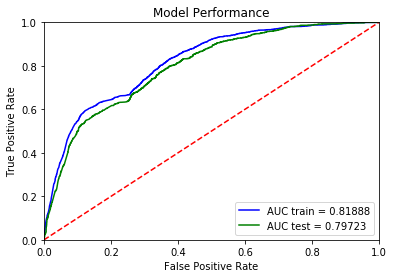

In [12]:
# ROC AUC
modelador.plot_roc_2(rf,X_train,y_train,X_test,y_test)

Se tiene un modelo con una AUC ROC de 80% aproximadamente similar en test y train. Por lo que el siguiente feature importance se toma como valido.

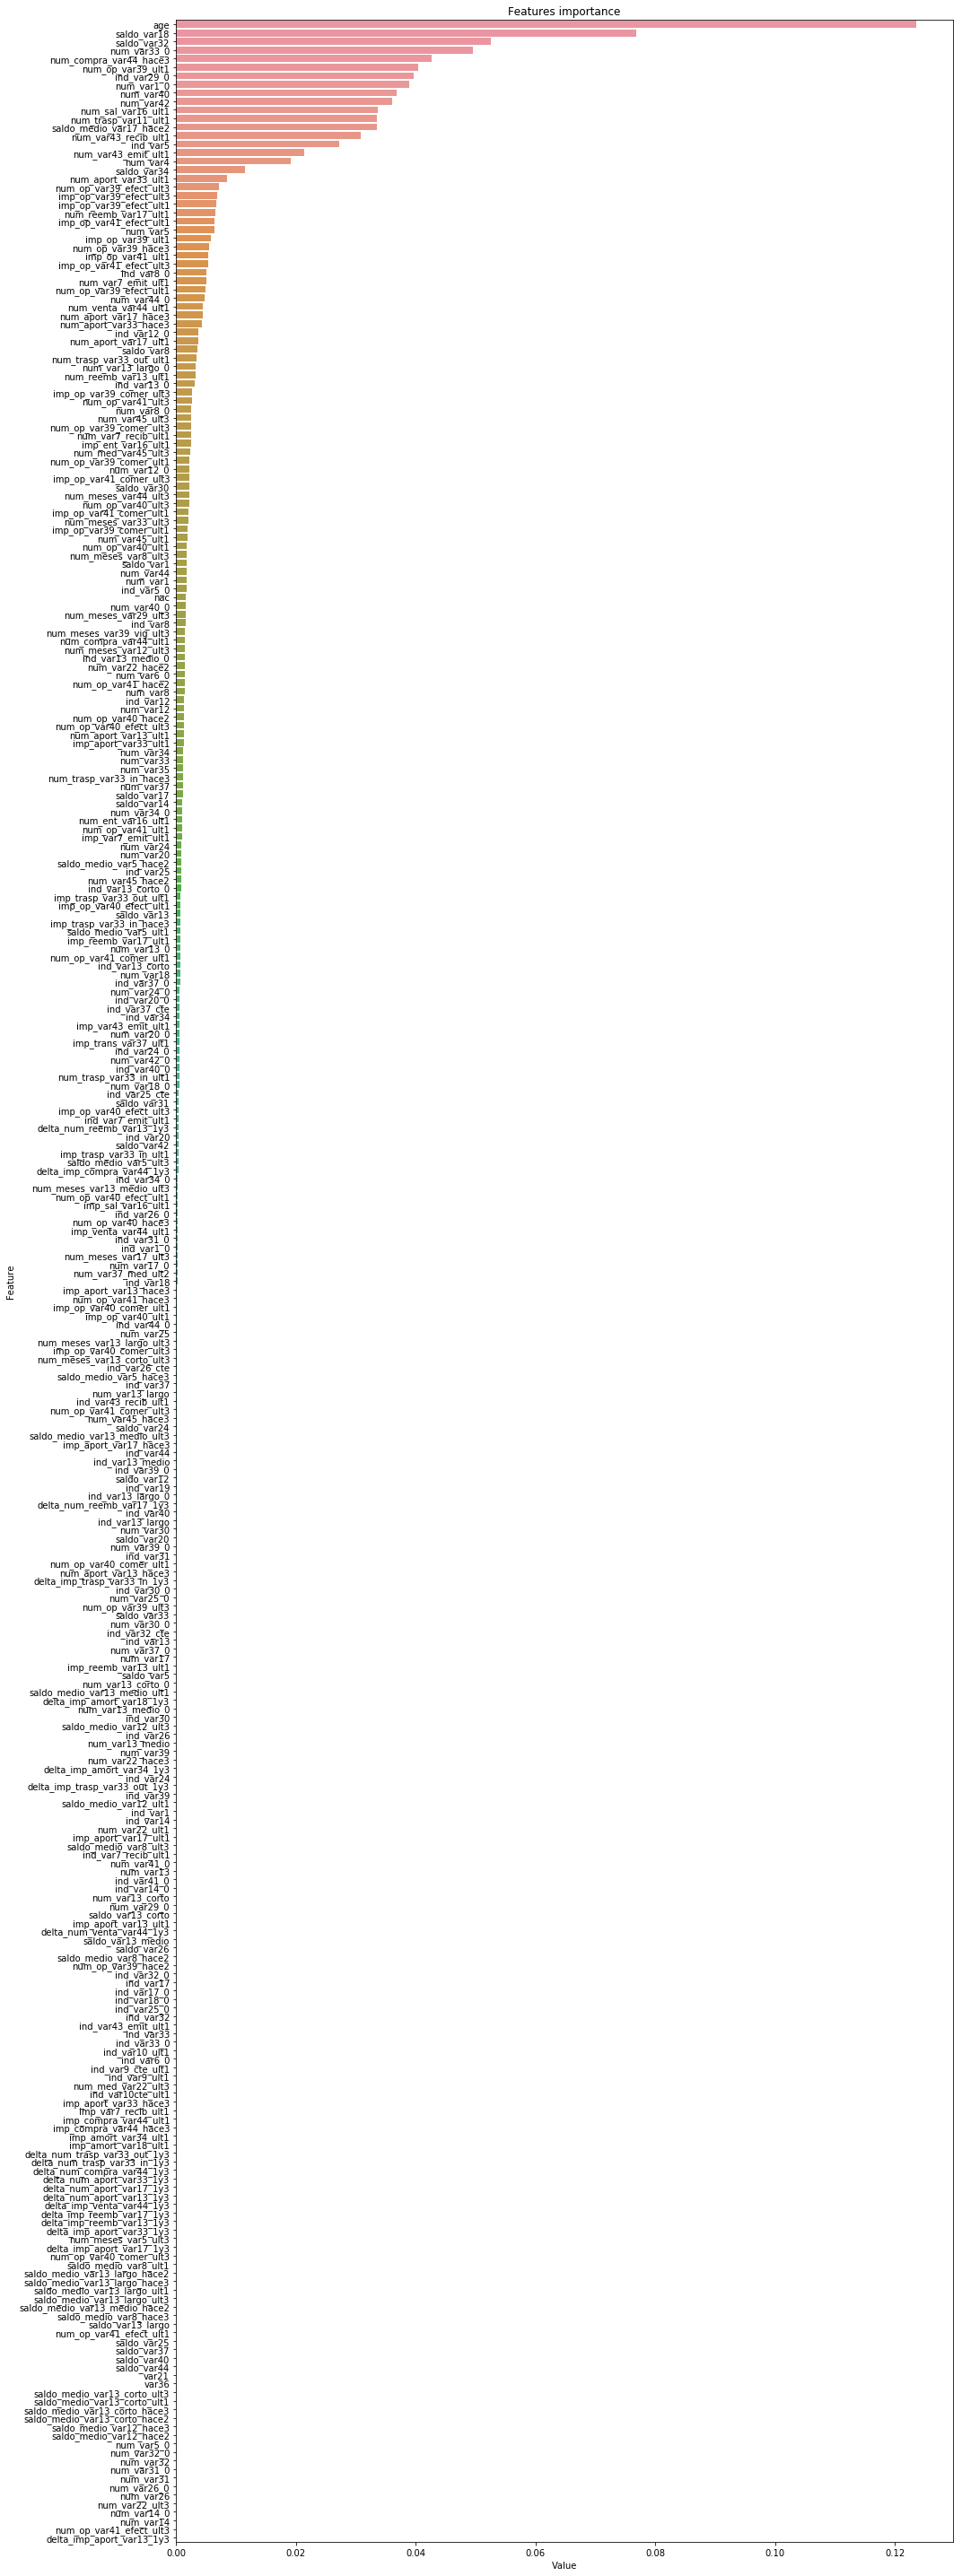

In [37]:
modelador.plot_feature_importance(rf,features)

In [29]:
# Se realizará un analisis sobre las 10 features mas importantes. 
# (se define analizar las primeras 10 por una cuestion de disponibilidad de tiempo de entrega)

In [51]:
# TOP 10 VARIABLES MAS IMPORTANTES

# age
# saldo_var18
# saldo_var32
# num_var33_0
# num_compra_var44_hace3
# num_op_var39_ult1
# ind_var29_0
# num_var1_0
# num_var40
# num_var42

# Armaremos una lista protegida de estos features para no eliminarlos por error.

In [10]:
features_protection = ['age',
                       'saldo_var18',
                       'saldo_var32',
                       'num_var33_0',
                       'num_compra_var44_hace3',
                       'num_op_var39_ult1',
                       'ind_var29_0',
                       'num_var1_0',
                       'num_var40',
                       'num_var42']

<h6>Segunda limpieza de datos. Hay columnas repetidas?</h6>

In [11]:
# Revisamos que no hayan columnas repetidas
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
duplicated_features = set(duplicated_feat)
print(len(duplicated_features))

20


In [12]:
duplicated_features = list(set(duplicated_features)-set(features_protection))

X_train.drop(labels = duplicated_features, axis = 1, inplace=True)
X_test.drop(labels = duplicated_features, axis = 1, inplace = True)
print(X_train.shape, X_test.shape)

(23105, 276) (9903, 276)


<h6>Tercera limpieza de datos (solo outliers)</h6>

In [78]:
X_train.describe()

,nac,age,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,...,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,2.310500e+04
mean,2.546505,33.512140,76.653484,77.918750,127.292696,4.168857,6.722350,0.547933,0.700138,3.640025,...,0.151084,1.765757,0.406220,3.808422,2.735770,16.513937,1.112551,39.626480,30.935186,1.160009e+05
std,7.943185,12.854083,1194.245970,374.014252,582.224462,95.281207,155.538118,23.872845,31.212258,91.482114,...,22.965292,173.449128,47.146948,429.854566,293.541118,950.876643,119.444976,1515.123076,1159.210143,1.517113e+05
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.727638e+04
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.053974e+05
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.178303e+05
max,223.000000,105.000000,76500.000000,12888.030000,15182.460000,5122.290000,11073.570000,1800.000000,3000.000000,5497.200000,...,3490.800000,22217.130000,6643.290000,63317.190000,42767.160000,123683.100000,17646.420000,126722.670000,89350.740000,9.792857e+06


Utilizo la definicion de outliers de tukey para detectar cuales registros son outliers en cada variable numerica y cual es el porcentaje de outliers que tiene cada variable. 
Definicion de outlier: cualquier valor que supere 3 veces el rango intercuartil

In [13]:
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]

In [14]:
outliers = pd.DataFrame(columns=['column', 'outliers_perc'])
row, col = X_train.shape
for x in X_train.columns:
    outliers = outliers.append({'column':x, 
                                 'outliers_perc': tukey_outliers(X_train,x,extreme=True).shape[0]/row}
                                , ignore_index = True)

In [70]:
# Analizamos las que variables presentan una cantidad mayor al 10% de observaciones con outliers.
pd.options.display.max_rows = 100
outliers = outliers[outliers['outliers_perc'] > 0.1].sort_values(by="outliers_perc", ascending = False)
outliers = outliers[outliers.column != 'Label']
outliers

,column,outliers_perc
174,num_var22_hace2,0.206362
117,saldo_var30,0.192253
175,num_var22_hace3,0.188444
83,num_op_var39_ult3,0.186843
79,num_op_var41_ult3,0.185501
124,saldo_var42,0.181736
207,saldo_medio_var5_hace3,0.164943
82,num_op_var39_ult1,0.160528
17,imp_op_var39_ult1,0.160528
78,num_op_var41_ult1,0.158927


De las 10 variables definidas como las mas importante la unica que presenta mas del 10% de outliers es la variable "num_op_var39_ult1". Esta ultima presenta el 16% de sus observaciones como outliers. Realizaremos un deep dive para entender mejor como esta compuesta y como tratar dichos valores.

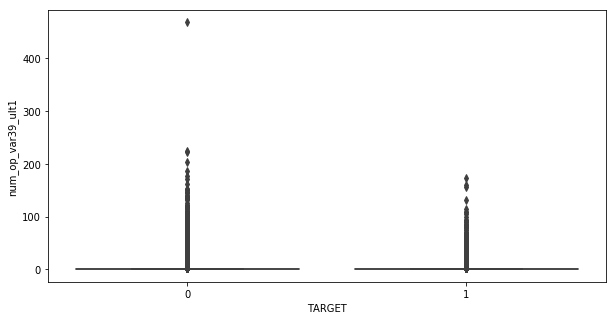

In [74]:
# outliers en num_op_var39_ult1
plt.subplots(figsize=(10,5))
sns.boxplot(data=df, orient="v", x='TARGET', y='num_op_var39_ult1')

No es tan claro si los outliers son reales si bien se pueden observar unos pocos valores alejados para el target 0. Como se espera trabajar con algortimos de modelado que utilicen arboles de base (los cuales trabajan por cortes), podemos obviar este tipo de outliers ya que la robustes de este tipo de algoritmos no se ve afectada por ellos.

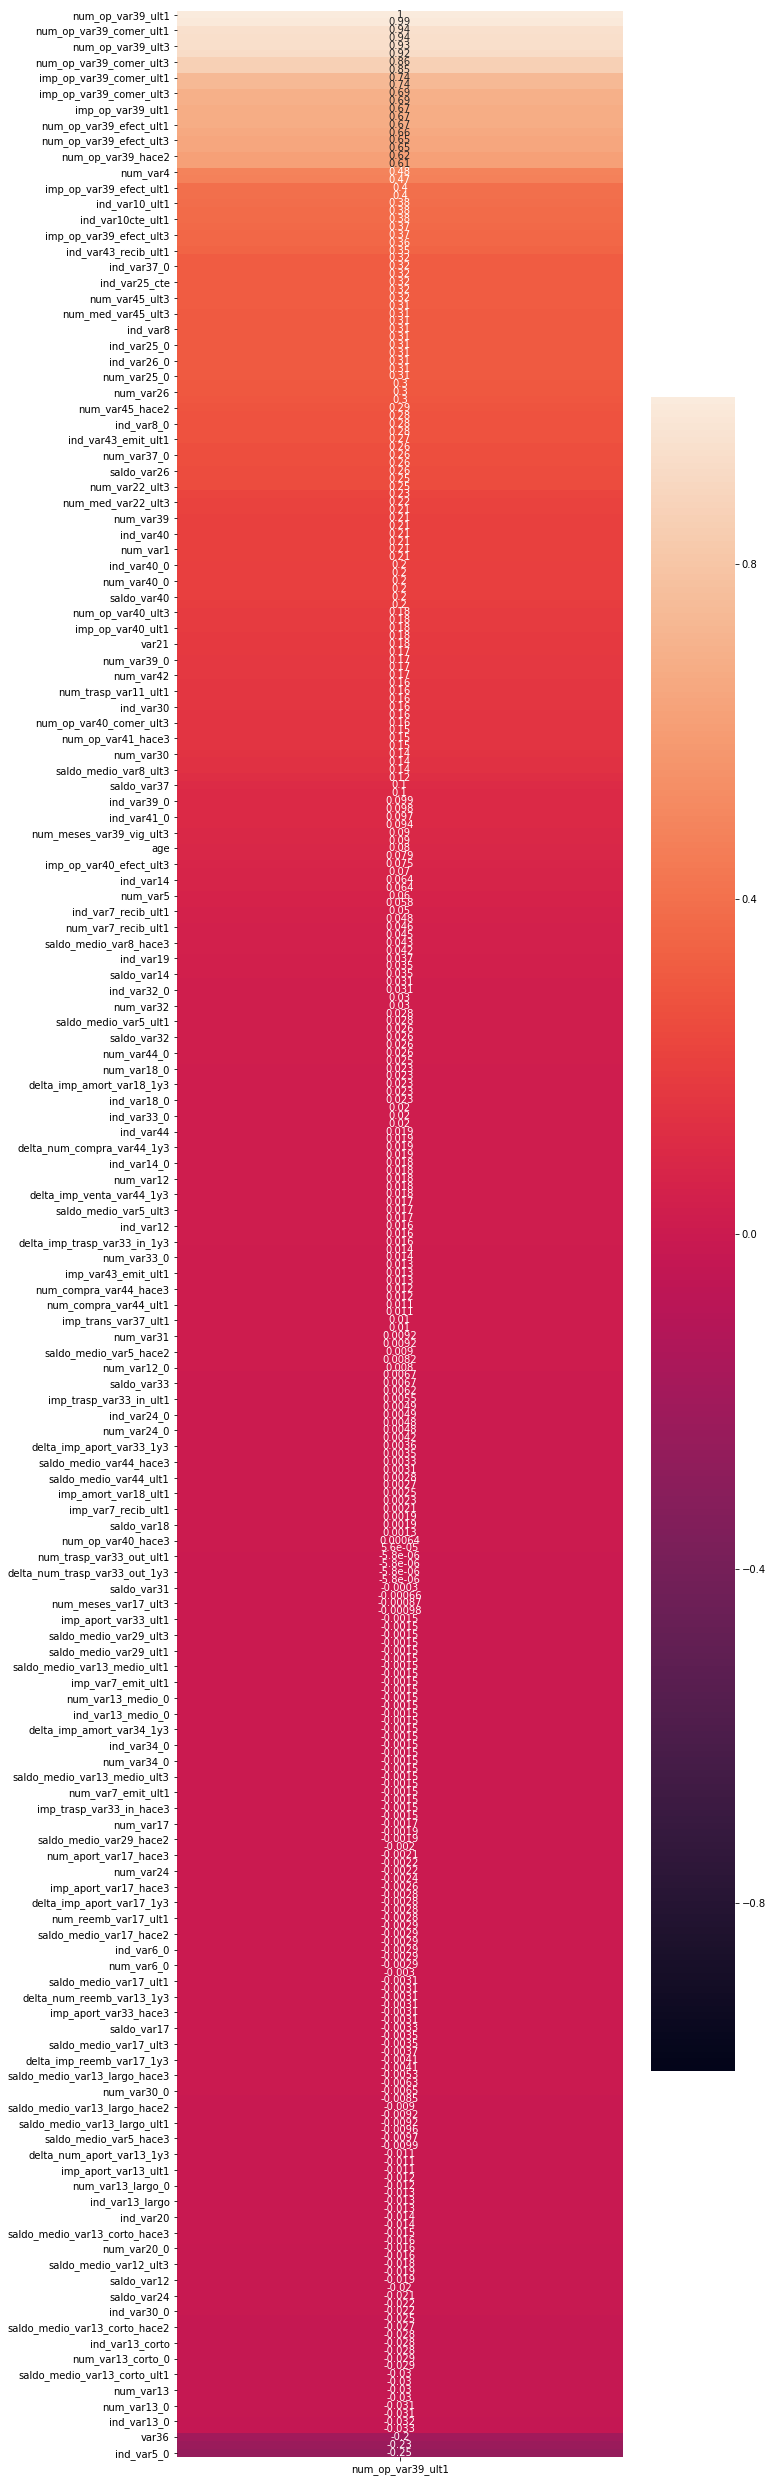

In [18]:
# Buscamos alguna columna que correlacione con "num_op_var39_ult1" 
# y no se encuentre entre las columnas que presentan outliers. 
# Si encontramos dicha columna podriamos reimputar los outliers.

# calculate the correlation matrix of numerical missing values
corr = df
sub_corr = corr.corr()
sub_corr = sub_corr.sort_values(by=['num_op_var39_ult1'],ascending=False)

# plot the heatmap
plt.subplots(figsize=(10,45))
sns.heatmap(sub_corr[['num_op_var39_ult1']], 
        xticklabels=['num_op_var39_ult1'],
        vmin=-1, vmax=1,
        annot=True)


No se encontró una variable que no este relacionada con la var39 y correlacione fuertemente con la variable que buscamos corregir. Insistimos con la idea de la robustes de los algoritmos con los que trabajaremos, los cuales no se ven afectados por este tipo de outliers.

Al observar la fuerte correlacion positiva entre todas las variables 39. Podrias seguir eliminando columnas que se encuentren fuertemente correlacionadas entre si?

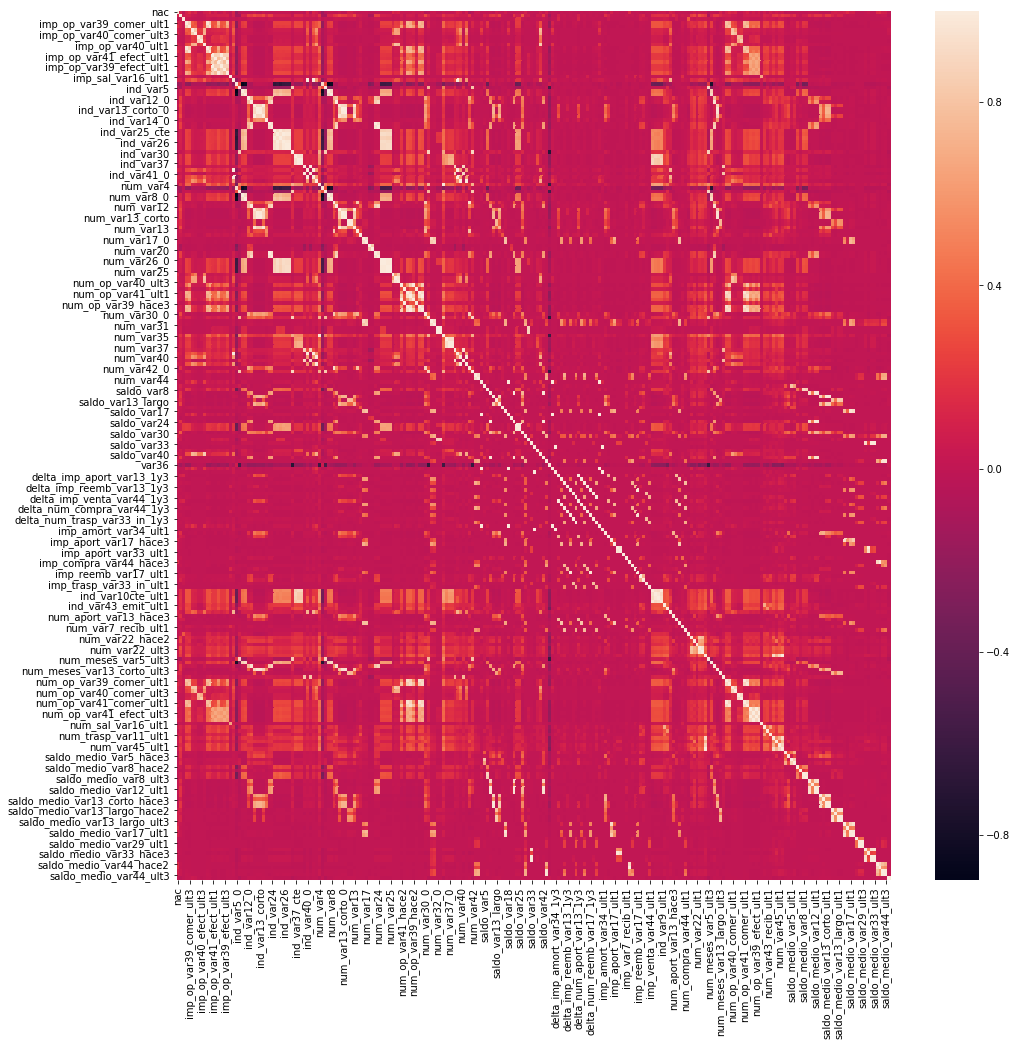

In [19]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat)

Se observan varios puntos "Claros" y algunos "Oscuros" que estarian indicando fuerte correlacion positiva o negativa entre variables. Esto nos permite seguir eliminando variables que se encuentran fuertemente correlacionadas.

In [13]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
                    

In [14]:
len(to_drop)

132

In [15]:
# Drop features 
to_drop = list(set(to_drop)-set(features_protection))

X_train.drop(X_train[to_drop], axis=1, inplace=True)
X_test.drop(X_test[to_drop], axis=1, inplace=True)

<h6>Ingenieria de atributos</h6>

In [16]:
# Creamos una nueva variable para las variables de saldo que resultan mas importantes
# saldo_var18
# saldo_var32

X_train['saldo_var18_var32'] = X_train['saldo_var18'] + X_train['saldo_var32']
X_test['saldo_var18_var32'] = X_test['saldo_var18'] + X_test['saldo_var32']


In [17]:
# Sumarizamos la cantidad de operaciones sobre las variables mas importantes
# num_var33_0
# num_compra_var44_hace3
# num_var1_0
# num_var40
# num_var42

X_train['cant_op'] = X_train['num_var33_0']+X_train['num_compra_var44_hace3']+X_train['num_var1_0']+X_train['num_var40']+X_train['num_var42']

X_test['cant_op'] = X_test['num_var33_0']+X_test['num_compra_var44_hace3']+X_test['num_var1_0']+X_test['num_var40']+X_test['num_var42'] 

In [18]:
# Ratio de saldo por cantidad de operaciones sobre las variables mas importantes
X_train['ratio_operaciones_saldo'] = X_train['saldo_var18_var32'] / X_train['cant_op']

X_test['ratio_operaciones_saldo'] = X_test['saldo_var18_var32'] / X_test['cant_op']

X_train.loc[X_train.saldo_var18_var32 / X_train.cant_op == float('inf'),"ratio_operaciones_saldo"]=1
X_train["ratio_operaciones_saldo"].fillna(0, inplace=True)

X_test.loc[X_test.saldo_var18_var32 / X_test.cant_op == float('inf'),"ratio_operaciones_saldo"]=1
X_test["ratio_operaciones_saldo"].fillna(0, inplace=True)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23105 entries, 5847 to 15795
Columns: 154 entries, nac to ratio_operaciones_saldo
dtypes: float64(61), int64(93)
memory usage: 27.3 MB


Si bien pudimos descartar la mitad de las variables aprox. lo cual ayuda a bajar la varianza del modelo a entrenar relacionado a la maldicion de dimensionalidad todavia tenemos muchas features. Ademas, observamos que hay una buena cantidad de variables con outliers en sus observaciones. Por estas razones decidimos que el modelo a entrenar utilizará de base arboles. Probaremos con random forest nuevamente buscando un modelo estable que pueda lidiar con la alta variabilidad y luego probaremos trabajar con un algoritmo de boosting (lgbm) buscando aumentar el performance del modelo superando a random forest e intentando no overfitear.

<h5>Balanceo del dataset</h5>

Comenzaremos por balancear el dataset

In [146]:
# Este bloque sirve para realizar un pipeline de SMOTE + RandomUnderSampler
# Implementaremos unicamente SMOTE en el siguiente bloque de codigo
# No creemos conveniente restar observaciones con RandomUnderSampler en este caso
''' 
# SMOTE: balanceo de clases

# define pipeline
over = SMOTE(sampling_strategy=0.15, random_state = 42)
under = RandomUnderSampler(sampling_strategy=0.15, random_state = 42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)
'''

In [22]:
df_aux = pd.DataFrame(y_train.TARGET.value_counts())
df_aux['Porcentaje'] = 100*df_aux['TARGET']/y_train.shape[0]
df_aux

,TARGET,Porcentaje
0,20981,90.807185
1,2124,9.192815


In [23]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Repetimos scores del modelo base presentado anteriormente
s_improve = []

rf = RandomForestClassifier(n_estimators=500,
                    max_features= 'auto',
                    max_depth=5,
                    min_samples_leaf=2, 
                    max_leaf_nodes = 300,
                    random_state=42)

print('Modelo base desbalanceado')
scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='roc_auc')
print(scores)
print(scores.mean())
print(' ')
s_improve.append(scores.mean())

cv = KFold(n_splits=3, random_state=42)

# Buscamos con CV cual es el mejor "sampling_strategy" para SMOTE
s_params = [0.15,0.2,0.25,0.3,0.4,0.5]

for i in s_params:
    
    smoter = SMOTE(sampling_strategy=i, random_state=42)
    print('Scores sampling_strategy: ', str(i))
    
    X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train,y_train)
    
    scores = cross_val_score(rf, X_train_fold_upsample, y_train_fold_upsample, cv=3, scoring='roc_auc')
    print(scores)
    print(scores.mean())
    print(' ')
    s_improve.append(scores.mean())
    



Modelo base desbalanceado
[0.80463016 0.80899922 0.79897189]
0.8042004238836862
 
Scores sampling_strategy:  0.15
[0.79135739 0.79732383 0.84560681]
0.8114293408850214
 
Scores sampling_strategy:  0.2
[0.79140576 0.85593512 0.90492341]
0.8507547603543051
 
Scores sampling_strategy:  0.25
[0.78671204 0.88902817 0.91068529]
0.8621418324687947
 
Scores sampling_strategy:  0.3
[0.78481743 0.91096147 0.9149262 ]
0.870235032705368
 
Scores sampling_strategy:  0.4
[0.81928979 0.91060738 0.91787041]
0.8825891933751557
 
Scores sampling_strategy:  0.5
[0.83655605 0.91192532 0.91511516]
0.8878655139247176
 


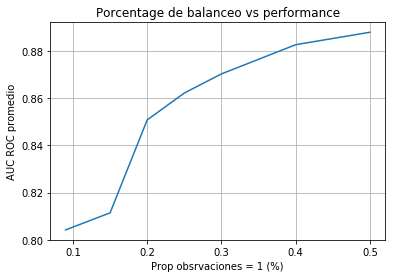

In [33]:
# Data for plotting
t = [0.09,0.15,0.2,0.25,0.3,0.4,0.5]

fig, ax = plt.subplots()
ax.plot(t, s_improve)

ax.set(xlabel='Prop obsrvaciones = 1 (%)', ylabel='AUC ROC promedio',
       title='Porcentage de balanceo vs performance')
ax.grid()
plt.show()

Vemos como cuanto mas balanceamos obtenemos un score promedio superior al modelo sin balancear. Con esto conlcuimos en que balancearemos utilizando el parametro "sampling_strategy" = 50%, lo cual resulta en tener el dataset mejor balanceado entre las 2 clases. No seguiremos incrementando el ratio porque entre 0.4 y 0.5 no se nota una mejora incremental promedio mucho mayor y siempre es preferible entrenar con la menor cantidad de variables sinteticas.

In [19]:
smoter = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_balanced, y_train_balanced = smoter.fit_resample(X_train,y_train)

In [35]:
df_aux = pd.DataFrame(y_train.TARGET.value_counts())
df_aux['Porcentaje'] = 100*df_aux['TARGET']/y_train.shape[0]
df_aux

,TARGET,Porcentaje
0,20981,66.667726
1,10490,33.332274


<h3>Modelado</h3>

In [17]:
# Repetimos scores del modelo base presentado anteriormente pero con el dataset balanceado y trabajado.
rf = RandomForestClassifier(n_estimators=500,
                    max_features= 'auto',
                    max_depth=10,
                    min_samples_leaf=2, 
                    max_leaf_nodes = 300,
                    random_state=42)

rf.fit(X_train_balanced, y_train_balanced)

/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(max_depth=10, max_leaf_nodes=300, min_samples_leaf=2,
                       n_estimators=500, random_state=42)

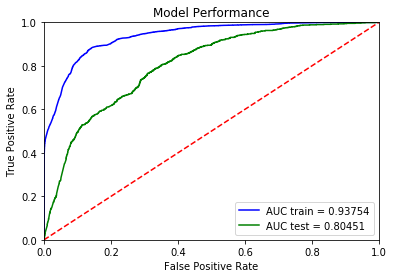

In [18]:
# ROC AUC Modelo Benchmark
modelador.plot_roc_2(rf,X_train_balanced,y_train_balanced,X_test,y_test)

Vemos que el performance en test es un punto de AUC ROC mayor que en el primer modelo que utilizaba todas las variables. Tambien observamos que overfitea fuertemente en train.

In [59]:
# Tuneo

param_test = {
    "n_estimators": [500],
    "max_features": ['auto','log2',0.5,0.75],
    "max_depth": [3,6,12,15],
    "bootstrap": [True,False],
    "min_samples_split": [2,6,12],
    "min_samples_leaf": [1,5,10]
    }

In [66]:
n_HP_points_to_test = 50

# Hacemos un tuneo probando 250 modelos distintos (50 iteraciones por 5 Folds por combinacion)
clf = RandomForestClassifier(random_state=42)
result_trainRandom = RandomizedSearchCV(
                    estimator=clf, 
                    param_distributions=param_test, 
                    n_iter=n_HP_points_to_test,
                    scoring='roc_auc',
                    cv=5,
                    refit=True,
                    random_state=42,
                    verbose=True,
                    n_jobs=-1)

result_trainRandom.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 42.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 6, 12, 15],
                                        'max_features': ['auto', 'log2', 0.5,
                                                         0.75],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 6, 12],
                                        'n_estimators': [500]},
                   random_state=42, scoring='roc_auc', verbose=True)

In [68]:
# Random Forest
print('Best score reached: {} with params: {} '.format(result_trainRandom.best_score_, result_trainRandom.best_params_))


Best score reached: 0.9482048122323581 with params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.75, 'max_depth': 15, 'bootstrap': False} 


/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


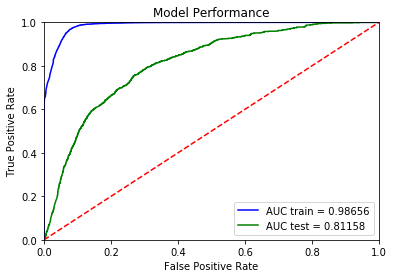

In [19]:
# Random Forest tuneado
rf = RandomForestClassifier(n_estimators=1000,
                    max_features= 0.75,
                    max_depth=15,
                    min_samples_split=2, 
                    min_samples_leaf=1,
                    bootstrap = False,
                    random_state=42)

rf.fit(X_train_balanced, y_train_balanced)

modelador.plot_roc_2(rf,X_train_balanced,y_train_balanced,X_test,y_test)

En la busqueda de los mejores hyperparametros conesguimos aumentar el performance en Test con respecto al modelo benchmark y al primer modelo corrido pero vemos que en Train se dispara el valor de AUC ROC y termina overfiteando.  

Aunque suene contraintuitivo probaremos como performa un modelo a base de boosting. Buscaremos hyperparametros que se encarguen fuertemente del overfitting e intentaremos mejorar el performance de test sin variar tanto con respecto a train.

In [38]:

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

'''
param_test = {
    "n_estimators": [500,700],
    "max_depth": [1,5,10,15],
    "colsample_bytree": [1,0.6,0.75],
    "min_child_weight": [0.001],
    "learning_rate":[0.1,0.01,0.005],
    'subsample': [1],
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
    'gamma': [1,5,10,15]
    }
'''

param_test = {
    "n_estimators": [500],
    "max_depth": [1,2,3,5,10],
    "colsample_bytree": [1,0.6,0.75],
    "learning_rate":[0.1,0.01,0.005],
    'gamma': [1,5,10]
    }

In [39]:
n_HP_points_to_test = 30

# Hacemos un tuneo probando 90 modelos distintos (30 iteraciones por 3 Folds por combinacion)
clf = LGBMClassifier(random_state=42)
result_trainRandom = RandomizedSearchCV(
                    estimator=clf, 
                    param_distributions=param_test, 
                    n_iter=n_HP_points_to_test,
                    scoring='roc_auc',
                    cv=5,
                    refit=True,
                    random_state=42,
                    verbose=True,
                    n_jobs=-1)

result_trainRandom.fit(X_train_balanced, y_train_balanced, **fit_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished
/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[48]	valid's auc: 0.828833	valid's binary_logloss: 0.268501


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [1, 0.6, 0.75],
                                        'gamma': [1, 5, 10],
                                        'learning_rate': [0.1, 0.01, 0.005],
                                        'max_depth': [1, 2, 3, 5, 10],
                                        'n_estimators': [500]},
                   random_state=42, scoring='roc_auc', verbose=True)

In [40]:
# LGBM
print('Best score reached: {} with params: {} '.format(result_trainRandom.best_score_, result_trainRandom.best_params_))

Best score reached: 0.9435995732853467 with params: {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 1} 


/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


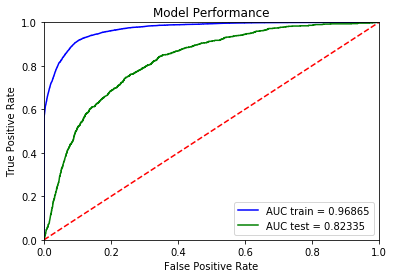

In [41]:
# Light gbm tuneado
lgboosting = LGBMClassifier(
                        n_estimators= 500,
                        max_depth= 10,
                        colsample_bytree= 1,
                        min_child_weight= 0.001,
                        learning_rate= 0.1,
                        subsample= 1,
                        reg_alpha= 5,
                        reg_lambda= 100,
                        gamma= 5,

                    random_state=42)

lgboosting.fit(X_train_balanced, y_train_balanced)

modelador.plot_roc_2(lgboosting,X_train_balanced,y_train_balanced,X_test,y_test)

Como se planteo anteriormente conseguimos un modelo que performe un poco mejor en test y overfitee unos puntos menos de ROC en train que el Random Forest. Sigue existiendo una diferencia importante entre las metricas de Test y Train que denotan un overfiting por parte del modelo.

Nace una nueva hipotesis en la que probablemente el balanceo por SMOTE al 50% este generando mucho ruido con tantas variables sinteticas. En el grafico vemos que utilizando CV los resultados mejoran a medida que mas se balancea el dataset pero esto es porque las metricas de performance son medidas sobre folds de test que tambien contienen variables sinteticas.

La unica forma de desambiguar esta duda es realizar nuevamente el balanceo pero comparar con muestras de test sin balancear dentro del CV.

In [30]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Repetimos scores del modelo base presentado anteriormente
s_improve = []

rf = RandomForestClassifier(n_estimators=500,
                    max_features= 'auto',
                    max_depth=5,
                    min_samples_leaf=2, 
                    max_leaf_nodes = 300,
                    random_state=42)

print('Modelo base desbalanceado')
scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='roc_auc')
print(scores)
print(scores.mean())
print(' ')
s_improve.append(scores.mean())

cv = KFold(n_splits=3, random_state=42)

# Buscamos con CV cual es el mejor "sampling_strategy" para SMOTE
s_params = [0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in s_params:
    
    scores = []
    
    smoter = SMOTE(sampling_strategy=i, random_state=42)
    print('Scores sampling_strategy: ', str(i))
    
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        
        # Arma cada fold con el cual entrenar
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        
        # Balancea
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
        
        # Fit del modelo con datos balanceados
        model_obj = rf.fit(X_train_fold_upsample, y_train_fold_upsample)
        
        # Score the model on the (non-upsampled) validation data
        score = metrics.roc_auc_score(y_test, model_obj.predict(X_test))
        scores.append(score)
        
    print(scores)
    print(np.array(scores).mean())
    print(' ')
    s_improve.append(np.array(scores).mean())
    



Modelo base desbalanceado
[0.80463016 0.80899922 0.79897189]
0.8042004238836862
 
Scores sampling_strategy:  0.15
[0.5, 0.5, 0.5]
0.5
 
Scores sampling_strategy:  0.2
[0.49988912296263444, 0.49988912296263444, 0.4999445614813172]
0.499907602468862
 
Scores sampling_strategy:  0.25
[0.5009649061634086, 0.5003992953036802, 0.49983368444395165]
0.5003992953036802
 
Scores sampling_strategy:  0.3
[0.5136083376521863, 0.5020406893641829, 0.5095269589238204]
0.5083919953133965
 
Scores sampling_strategy:  0.4
[0.669792567124507, 0.666531540503482, 0.6661322451998019]
0.667485450942597
 
Scores sampling_strategy:  0.5
[0.6947046556816454, 0.69240922506985, 0.6934407954248422]
0.6935182253921126
 
Scores sampling_strategy:  0.6
[0.6956814773637755, 0.69814391337744, 0.6986540857184856]
0.6974931588199004
 
Scores sampling_strategy:  0.7
[0.7001298540687608, 0.6976344308822149, 0.6982007315877641]
0.6986550055129133
 
Scores sampling_strategy:  0.8
[0.7016855818209823, 0.6956730110741577, 0.698

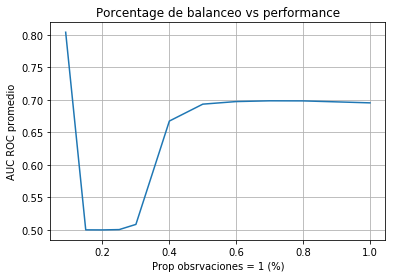

In [31]:
# Data for plotting
t = [0.09,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

fig, ax = plt.subplots()
ax.plot(t, s_improve)

ax.set(xlabel='Prop obsrvaciones = 1 (%)', ylabel='AUC ROC promedio',
       title='Porcentage de balanceo vs performance')
ax.grid()
plt.show()

Confirmamos la hipotesis. SMOTE en este caso no parece ser una buena tecnica para balancear el dataset y asi conseguir mejores resultados de performance. Si observamos el grafico, el valor mas alto se encuentra en 0.09 que es el dataset original sin variables sinteticas, luego la curva crece y se aplana en 0.5.

Que sucede si en vez de realizar SMOTE buscamos disminuir la clase mayoritaria?

In [32]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Repetimos scores del modelo base presentado anteriormente
s_improve = []

rf = RandomForestClassifier(n_estimators=500,
                    max_features= 'auto',
                    max_depth=5,
                    min_samples_leaf=2, 
                    max_leaf_nodes = 300,
                    random_state=42)

print('Modelo base desbalanceado')
scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='roc_auc')
print(scores)
print(scores.mean())
print(' ')
s_improve.append(scores.mean())

cv = KFold(n_splits=3, random_state=42)

# Buscamos con CV cual es el mejor "sampling_strategy" para SMOTE
s_params = [0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in s_params:
    
    scores = []
    
    #smoter = SMOTE(sampling_strategy=i, random_state=42)
    rus = RandomUnderSampler(sampling_strategy=i, random_state = 42)
    print('Scores sampling_strategy: ', str(i))
    
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        
        # Arma cada fold con el cual entrenar
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        
        # Balancea
        X_train_fold_upsample, y_train_fold_upsample = rus.fit_resample(X_train_fold,
                                                                           y_train_fold)
        
        # Fit del modelo con datos balanceados
        model_obj = rf.fit(X_train_fold_upsample, y_train_fold_upsample)
        
        # Score the model on the (non-upsampled) validation data
        score = metrics.roc_auc_score(y_test, model_obj.predict(X_test))
        scores.append(score)
        
    print(scores)
    print(np.array(scores).mean())
    print(' ')
    s_improve.append(np.array(scores).mean())
    



Modelo base desbalanceado
[0.80463016 0.80899922 0.79897189]
0.8042004238836862
 
Scores sampling_strategy:  0.15
[0.5, 0.5, 0.5]
0.5
 
Scores sampling_strategy:  0.2
[0.5, 0.5, 0.5]
0.5
 
Scores sampling_strategy:  0.25
[0.5051571619291401, 0.5005656108597285, 0.5101037954564497]
0.5052755227484393
 
Scores sampling_strategy:  0.3
[0.513619563325087, 0.5505961773009117, 0.6034786290781803]
0.5558981232347263
 
Scores sampling_strategy:  0.4
[0.681726523543309, 0.6886808592619202, 0.6921201169577147]
0.687509166587648
 
Scores sampling_strategy:  0.5
[0.6995179608257881, 0.7044765098718191, 0.7050084437128454]
0.7030009714701508
 
Scores sampling_strategy:  0.6
[0.7126399571743713, 0.7163816181926642, 0.7108581481327253]
0.7132932411665869
 
Scores sampling_strategy:  0.7
[0.712512837403591, 0.7080369922922899, 0.7041773676386552]
0.708242399111512
 
Scores sampling_strategy:  0.8
[0.7111871418759492, 0.7110664188573244, 0.698714854863965]
0.7069894718657462
 
Scores sampling_strategy:

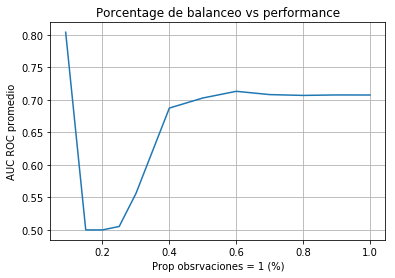

In [33]:
# Data for plotting
t = [0.09,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

fig, ax = plt.subplots()
ax.plot(t, s_improve)

ax.set(xlabel='Prop obsrvaciones = 1 (%)', ylabel='AUC ROC promedio',
       title='Porcentage de balanceo vs performance')
ax.grid()
plt.show()

Obtenemos un resultado similar al de utilizar SMOTE. Solo mejora en 1 o 2 puntos de ROC.

Reentrenaremos con los mejores parametros obtenidos en el tunning el Random Forest y el LightGBM para definir que modelo es mejor para este caso.

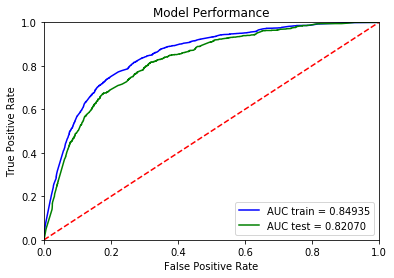

In [36]:
# Random Forest tuneado
rf = RandomForestClassifier(n_estimators=1000,
                    max_features= 0.75,
                    max_depth=5,
                    min_samples_split=2, 
                    min_samples_leaf=1,
                    bootstrap = False,
                    random_state=42)

rf.fit(X_train, y_train)

modelador.plot_roc_2(rf,X_train,y_train,X_test,y_test)

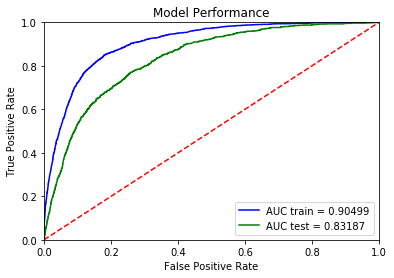

In [34]:
# Light gbm tuneado
lgboosting = LGBMClassifier(
                        n_estimators= 500,
                        max_depth= 10,
                        colsample_bytree= 1,
                        min_child_weight= 0.001,
                        learning_rate= 0.1,
                        subsample= 1,
                        reg_alpha= 5,
                        reg_lambda= 100,
                        gamma= 5,

                    random_state=42)

lgboosting.fit(X_train, y_train)

modelador.plot_roc_2(lgboosting,X_train,y_train,X_test,y_test)

Definimos que el mejor modelo para este caso es el Random Forest. El algoritmo presenta mayor estabilidad que se refleja en menor varianza, lo cual nos da motivos de pensar que tenemos un modelo mas robusto y que por lo general performará en dichos valores. Es cierto que el modelo de boosting (LGBM) presenta 1 punto de AUC ROC mas en test que RF pero creemos que por esa mejora de performance es mejor priorizar la estabilidad del modelo.

Ahora nos interesa entender cual es el mejor treshold para definir el cutoff de nuestro modelo con el cual se determinará probabilidad de que un cliente haga churn o no. 

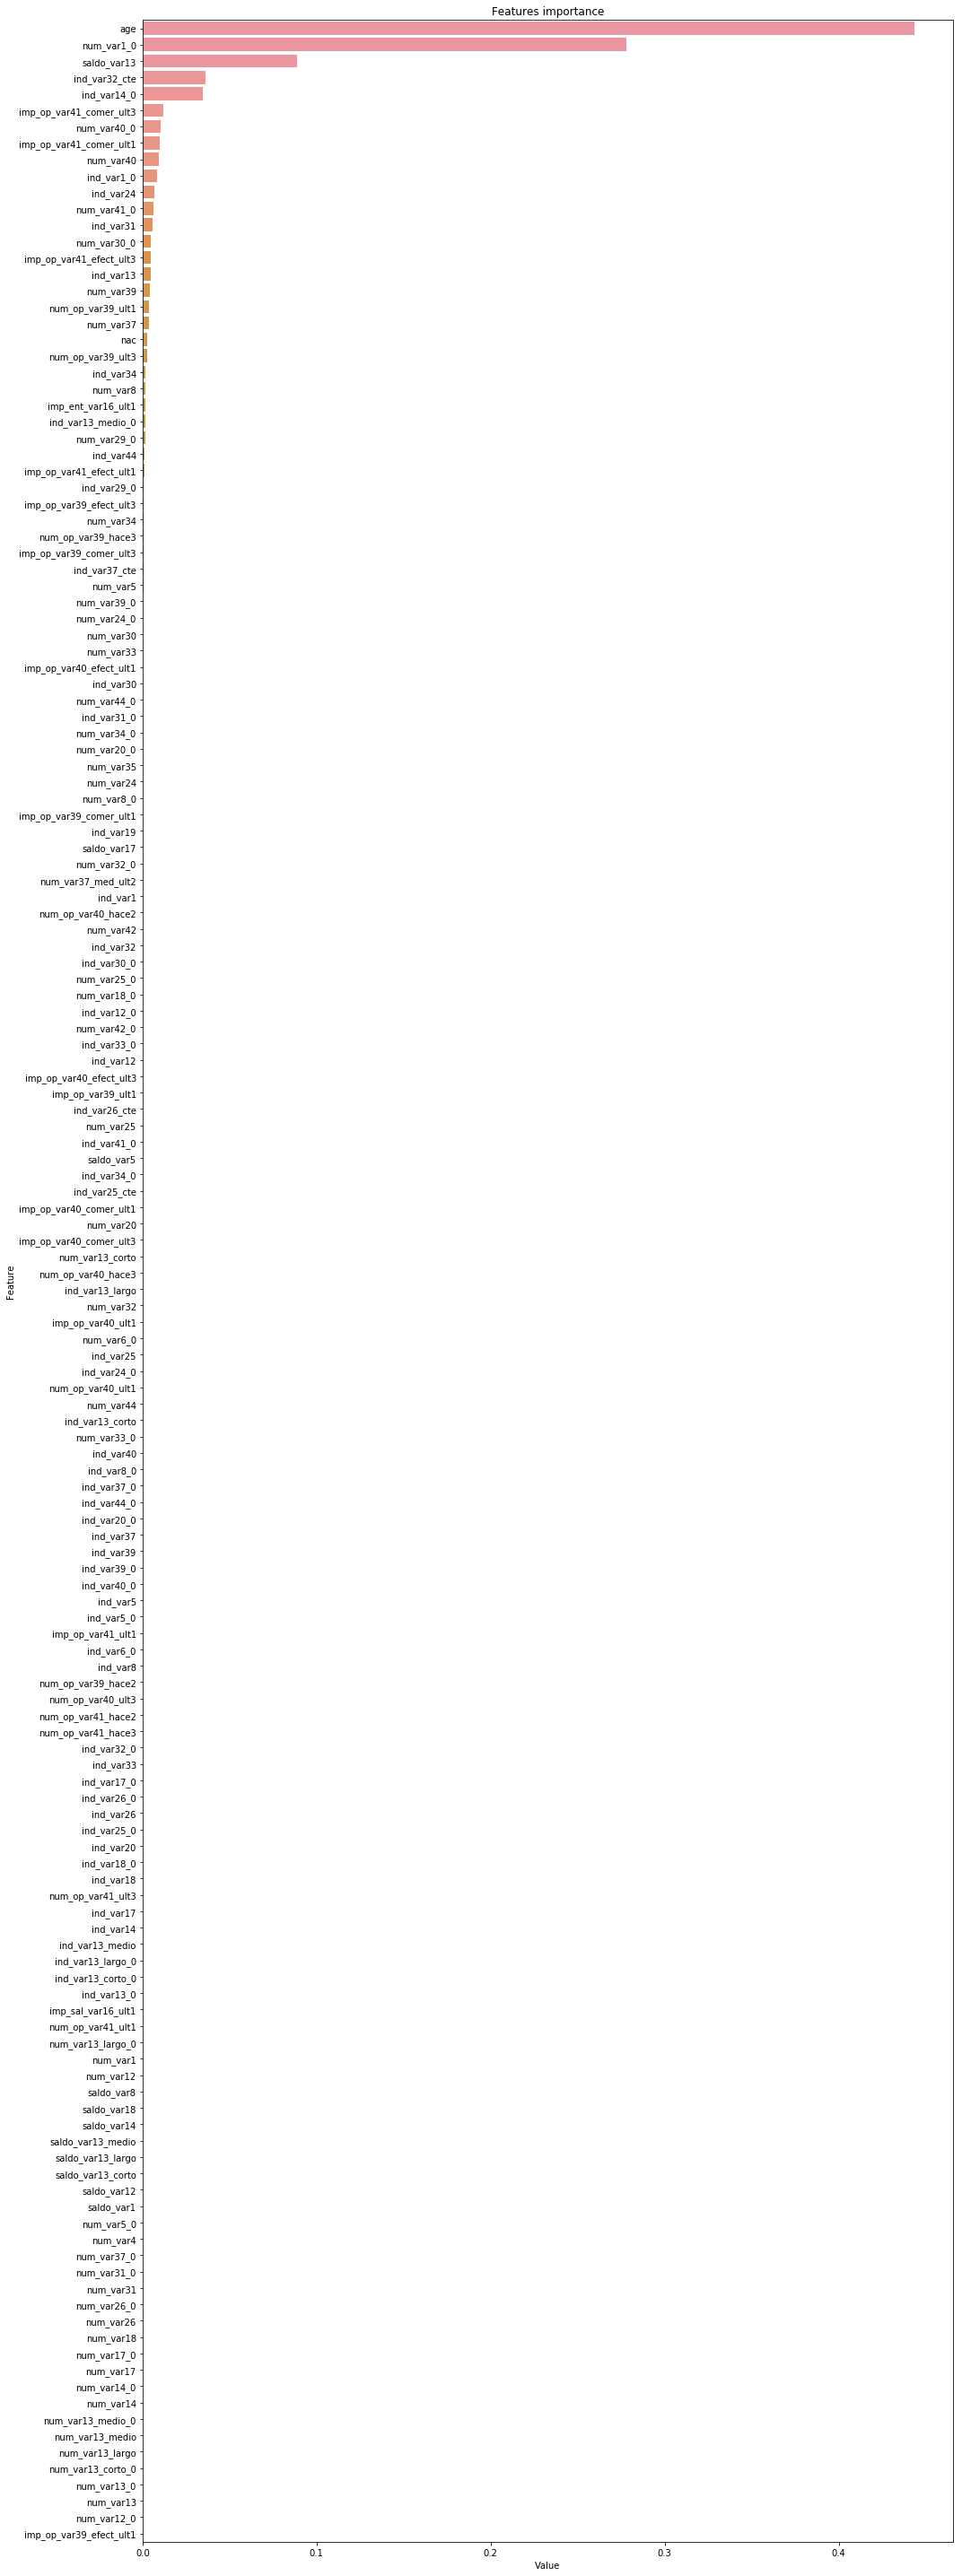

In [45]:
modelador.plot_feature_importance(rf,features)

Nuevo feature importance: Vemos que ninguna de las variables que creiamos o seteamos como importantes al principio del trabajo nuestro mejor modelo practicamente no las utiliza para tomar decisiones salvo por la variable age que sigue siendo la mas importante y en mucha menor importancia la variable num_var40. De este nuevo grafico debemos tener en cuenta que la toma de decisiones se encuentra muy restringida mayormente por las primeras 5 variables mas importantes, lo cual podria indicar que con modelos mas sencillos podriamos llegar a resultados similares. 

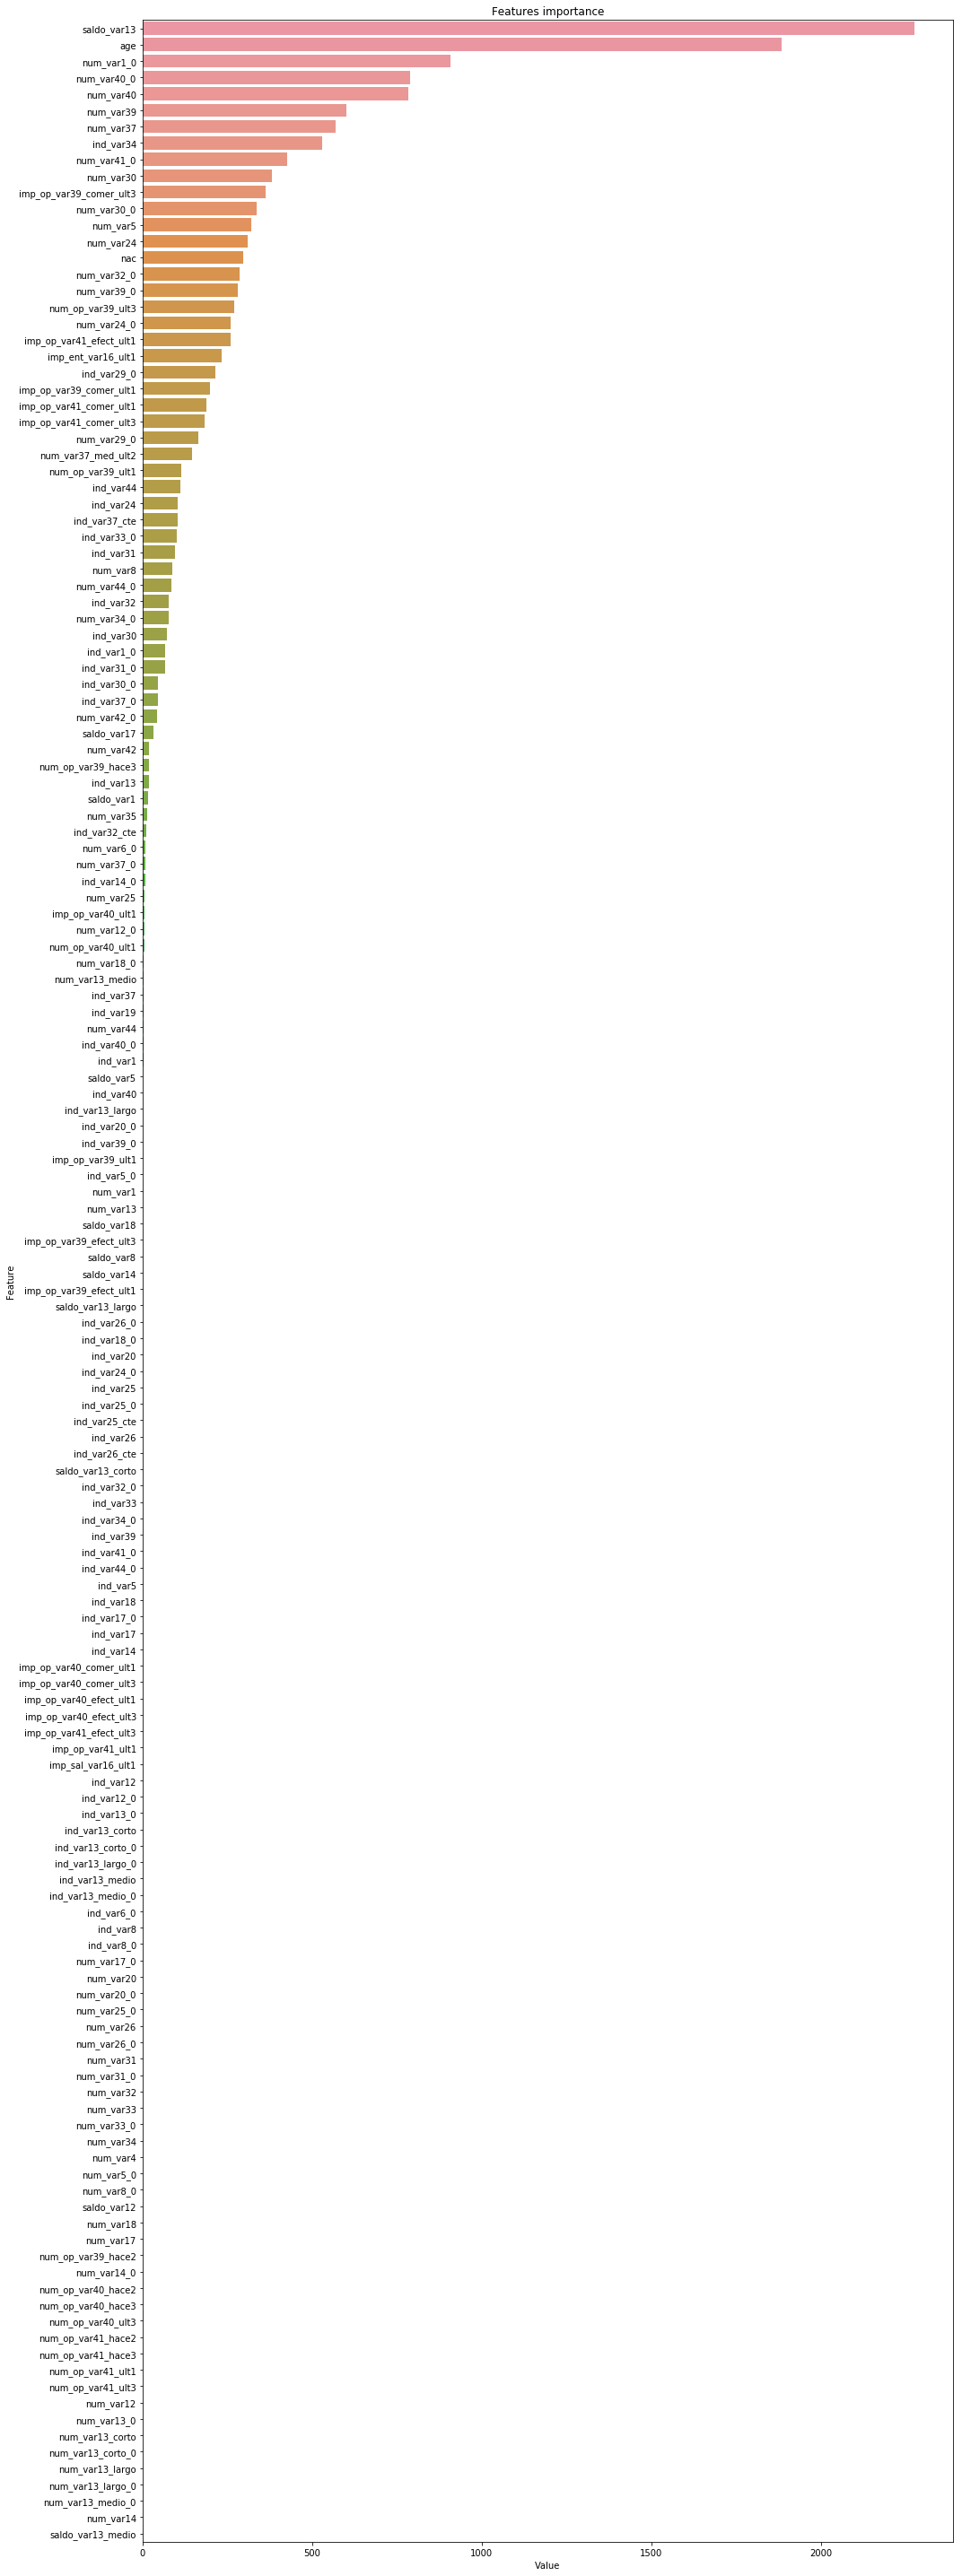

In [46]:
modelador.plot_feature_importance(lgboosting,features)

Aprovechamos para plotear el feature importance del modelo de boosting y observamos que a diferencia del modelo de RF este ultimo distribuye de manera mas robusta la importance que le da a las variables para la toma de decisiones. Esto tambien podria utilizarse para repensar la eleccion del mejor modelo. Esto se debe a que si el modelo depende de muy pocas variables (ej: 5 como nuestro RF) y por X razon una o dos se encuentran sesgadas o mal imputadas el output de nuestro modelo se podria ver fuertemente sesgado por ellas. En cambio, en el caso del modelo de boosting vemos que la importancia de las variables se encuentra mucho mas distribuida entre mas features, lo cual podria llevarnos a pensar que es mas robusto.

In [38]:
# Al ser no cost sensitive los modelos de sklearn, buscaremos cual seria el mejor threshold para predecir.

def plot_roc_curve(fpr,tpr, thresholds):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])

    #plt.savefig('roc_and_threshold.png')
    #plt.close()
    plt.show()
    
    
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


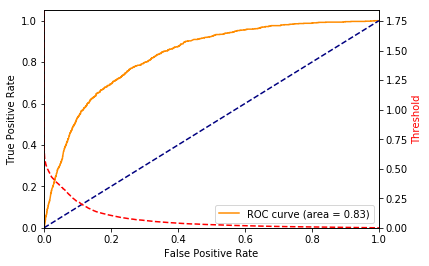

In [53]:
probs = lgboosting.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,probs[:,1])

plot_roc_curve(fpr,tpr, threshold)

In [54]:
threshold = Find_Optimal_Cutoff(y_test,probs[:,1])
print(threshold)

[0.08076163443338592]


/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [55]:
# Confusion matrix train
predictions = generate_y_pred_with_custom_threshold(lgboosting, X_train, threshold)
confMat = metrics.confusion_matrix(y_train, predictions) # Calculate the metrics comparing real vs predict
print(confMat)

count_zero 16422
count_one 6683
[[16167  4814]
 [  255  1869]]


In [57]:
# Confusion matrix test
predictions = generate_y_pred_with_custom_threshold(lgboosting, X_test, threshold)
confMat = metrics.confusion_matrix(y_test, predictions) # Calculate the metrics comparing real vs predict
print(confMat)

count_zero 7012
count_one 2891
[[6793 2226]
 [ 219  665]]


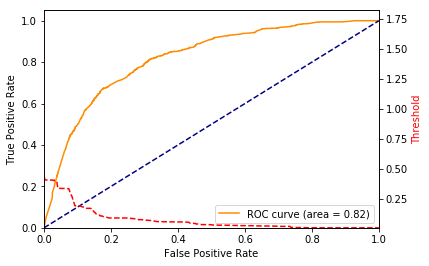

In [39]:
probs = rf.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,probs[:,1])

plot_roc_curve(fpr,tpr, threshold)

In [40]:
threshold = Find_Optimal_Cutoff(y_test,probs[:,1])
print(threshold)

[0.08860174063792678]


/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Este ultimo será el treshold que definirá si un cliente tiene alta probabilidad de cometer churn. Redefinimos una funcion de costos para scorear en base al cutoff anterior (recordamos que sklearn siempre scorea por 50% y no es customisable)

In [41]:
# Rearmamos las predicciones con el mejor threshold
def generate_y_pred_with_custom_threshold(model, x_data, threshold):
    y_predictions = model.predict_proba(x_data)
    y_pred = []
    count_zero = 0
    count_one = 0
    for i in range(len(list(y_predictions))):
        if y_predictions[i][1] > threshold:
            y_pred.append(1)
            count_one += 1
        else:
            y_pred.append(0)
            count_zero += 1
    print("count_zero " + str(count_zero))
    print("count_one " + str(count_one))
    return y_pred

In [42]:
# Confusion matrix train
predictions = generate_y_pred_with_custom_threshold(rf, X_train, threshold)
confMat = metrics.confusion_matrix(y_train, predictions) # Calculate the metrics comparing real vs predict
print(confMat)

count_zero 16081
count_one 7024
[[15648  5333]
 [  433  1691]]


In [43]:
# Confusion matrix test
predictions = generate_y_pred_with_custom_threshold(rf, X_test, threshold)
confMat = metrics.confusion_matrix(y_test, predictions) # Calculate the metrics comparing real vs predict
print(confMat)

count_zero 6933
count_one 2970
[[6706 2313]
 [ 227  657]]


Segun las matrices de confusion con el treshold de 0.088 tanto en test como en train se presenta una accuracy del 75% aproximadamente.